In [86]:
import scipy.io as sio
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import xlabel, ylabel, plot, show, title
from matplotlib import rcParams
rcParams['figure.figsize'] = (12,3)



data = sio.loadmat('spikes-1.mat')
SpikesLow = data['SpikesLow'][0]
SpikesHigh = data['SpikesHigh'][0]

T = 30
n = len(SpikesLow)
f = n / T
print('f =', f)


f = 25.0


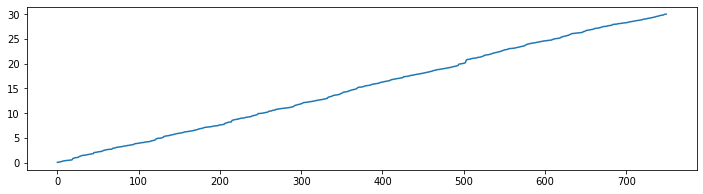

In [87]:
plot(SpikesLow)
show()


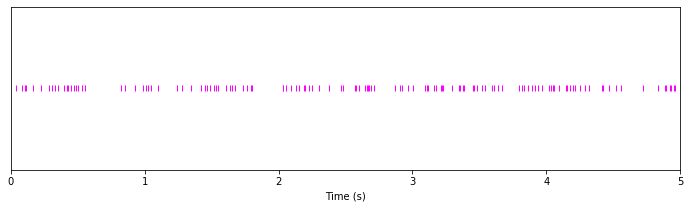

In [88]:
import numpy as np  
plot(SpikesLow, np.ones_like(SpikesLow), '|', color = "fuchsia")  
plt.xlim([0, 5])                                
plt.xlabel('Time (s)')                          
plt.yticks([])                                  
show()


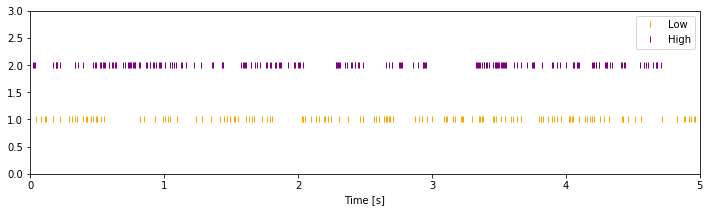

In [89]:
#Para plotar 2 spikes ao mesmo tempo. Se tivesse uma matriz de tempo, utilizar "for"
#É possível observar que o sinal azul é menos contínuo que o laranja

plot(SpikesLow, np.ones_like(SpikesLow), '|', color = "orange")  
plot(SpikesHigh, 2 * np.ones_like(SpikesHigh), '|', color = "purple")  
plt.xlim([0, 5])              
plt.ylim([0, 3])              
xlabel('Time [s]')            
plt.legend({'Low', 'High'})   
show()



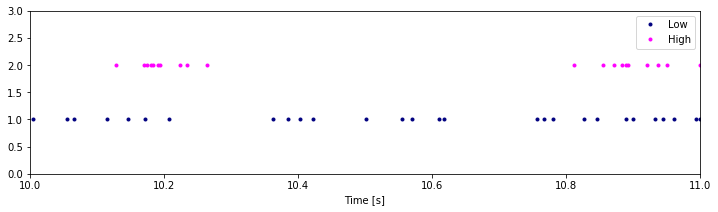

In [90]:
#Nesse é possível ter uma ideia do comprimento do plot. O Azul apresenta períodos longos sem spikes e padrões de burst.
#É possível ter uma ideia de quanto tempo existe entre o disparo de neurônios

plot(SpikesLow, np.ones_like(SpikesLow), '.', color = "navy")  
plot(SpikesHigh, 2 * np.ones_like(SpikesHigh), '.', color = "fuchsia")  
plt.xlim([10, 11])              
plt.ylim([0, 3])                
xlabel('Time [s]')              
plt.legend({'Low', 'High'})


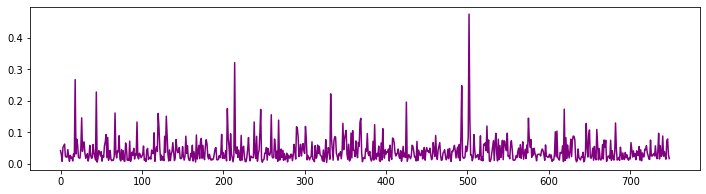

In [91]:
#Caulculo do intervalo de disparo entre os neurônios - visualização diferente do comportamento do neurônio
#Ele mostra as diferenças emtre spikes (praticamente 0) e o intervalo entre spikes - passa a ideia de variabilidade de spikes

ISIsLow = np.diff(SpikesLow)    
ISIsHigh = np.diff(SpikesHigh)
plot(ISIsLow, color = "purple")
show()



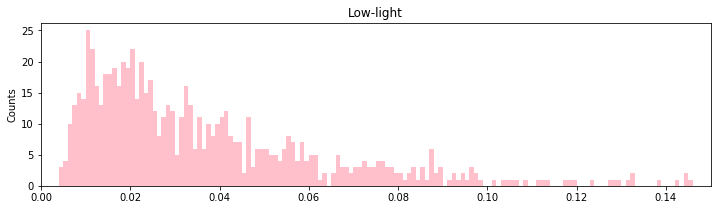

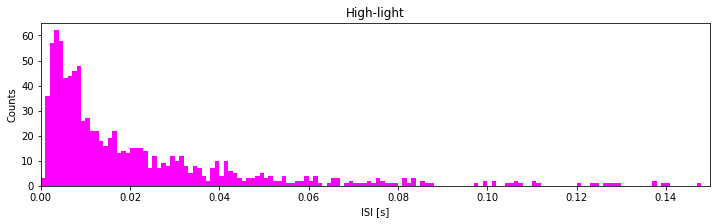

In [92]:
#O que geralmente se faz: construção de histograma (comparação visual) 

bins = np.arange(0, .5, 1e-3)
plt.hist(ISIsLow, bins, color = "pink")        
plt.xlim([0, 0.15])            
ylabel('Counts')               
title('Low-light')             
plt.show()             #quantos valores de spikes tem em cada bins = eixo x

#característica = "cauda pesada" (ele cai, mas os elementos continuam)

plt.hist(ISIsHigh, bins, color = "fuchsia")      
plt.xlim([0, 0.15])            
xlabel('ISI [s]')              
ylabel('Counts')              
title('High-light')            
plt.show()



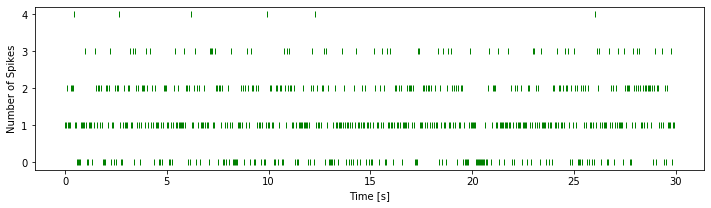

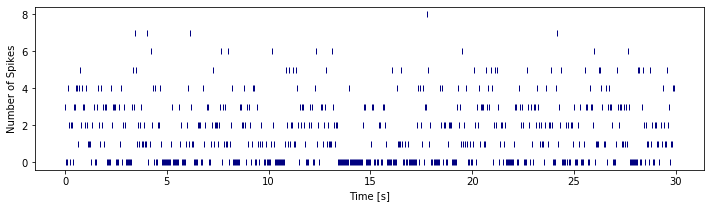

In [93]:
#Criar bins no eixo do tempo e fazer a contagem do padrão do desparo
#1- criar padrao de disparo = contar quantos spikes houveram 

time_bins = np.arange(0, 30, 0.05)                    
IncrementsLow50, _ = np.histogram(SpikesLow, time_bins)  
plot(time_bins[:-1], IncrementsLow50, '|', color = "green")               
xlabel('Time [s]')                                       
ylabel('Number of Spikes')
show()

time_bins = np.arange(0, 30, 0.05)                    
IncrementsLow50, _ = np.histogram(SpikesHigh, time_bins)  
plot(time_bins[:-1], IncrementsLow50, '|', color = "navy")               
xlabel('Time [s]')                                       
ylabel('Number of Spikes')
show()


In [94]:
#fator de fano = o quão variável são os seu spikes. Ele é a VARIÂNCIA / MÉDIA


FF50Low = IncrementsLow50.var() / IncrementsLow50.mean()
print('FF50Low =', FF50Low)


#Como interpretar: Processo de Poisson Se os nossos neuronios disparassem como esse processo, o passado influencia esse processo.
#e o FF < 1, os spikes são mais regulares que o processo de Poisson: o passado está influenciando os spikes de uma maneira mais previsível.
#Se o FF > 1, os spikes são mais variáveis que um processo de Poisson


FF50Low = 1.7786165348043843


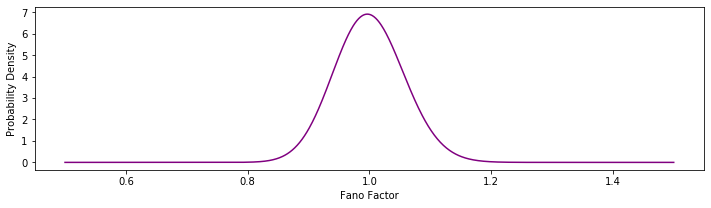

array([0.88985257, 1.11648138])

In [95]:
from scipy.stats import gamma   
N = IncrementsLow50.shape[0];  
shape = (N - 1) / 2            
scale = 2 / (N - 1)             
FF = np.linspace(.5, 1.5, 1000) 
Y = gamma.pdf(FF, shape, 
              scale=scale)      
plot(FF,Y, color = "purple");                     
xlabel('Fano Factor')          
ylabel('Probability Density')  
show()

gamma.ppf([.025, .975], shape, scale=scale)
np.array([0.88985257, 1.11648138])

#Se um processo de poisson possuir uma ditribuição gama e 2 variáveis, é possível ter uma ideia do quão significativo o fator de Fan é
#Indica que o fator de fan encontrado é significativo

In [96]:
#Autocorrelação dos Incrementos
#Serve para saber se existe correlação linear
#lag = 0 dará 1. Esses valores são outra maneira de visualizar o que a correlação diz
#se um bin tem um valor alto (alta quantidade de disparos), o proximo tbm será alto

def autocorr(x, lags):
    xcorr = np.correlate(x - x.mean(), x - x.mean(), 'full')  
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               
    return xcorr[:lags+1]                                     
    
autocorr(IncrementsLow50, 3)

np.array([1.        , 0.03894992, 0.07055464, 0.04431669])

array([1.        , 0.03894992, 0.07055464, 0.04431669])

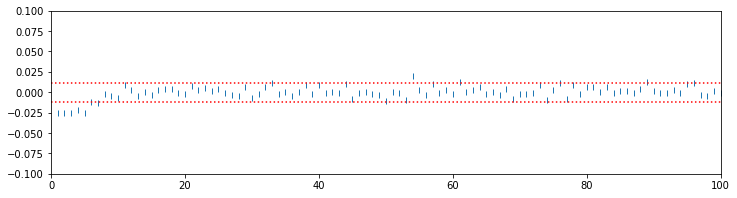

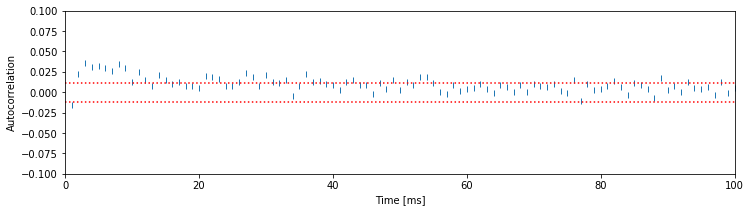

In [97]:
time_bins = np.arange(0, 30, 0.001)                    
IncrementsLow1, _ = np.histogram(SpikesLow, time_bins) 
ACFLow = autocorr(IncrementsLow1, 100)                 

plot(ACFLow, '|')        
N1 = len(IncrementsLow1)                    
sig = 2 / np.sqrt(N1)                       
plot([0, 100], [sig, sig], 'r:')           
plot([0, 100], [-sig, -sig], 'r:')
plt.xlim([0, 100])                         
plt.ylim([-.1, .1])                        
show()

IncrementsHigh1, _ = np.histogram(SpikesHigh, time_bins) 
ACFHigh = autocorr(IncrementsHigh1, 100)                 
plot(ACFHigh, '|')                                       
sig = 2 / np.sqrt(len(IncrementsHigh1))                  
plot([0, 100], [sig, sig], 'r:')                               
plot([0, 100], [-sig, -sig], 'r:')
plt.xlim([0, 100])                                       
plt.ylim([-.1, .1])
xlabel('Time [ms]')
ylabel('Autocorrelation')
show()


/home/aluno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


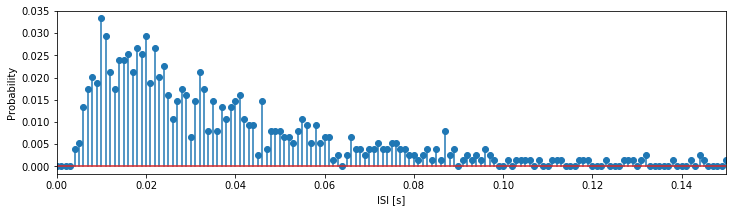

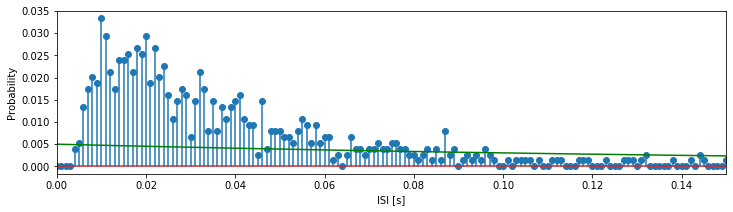

In [98]:
#Construindo um Modelo

bins = np.arange(0, .5, 0.001)           
counts, _ = np.histogram(ISIsLow, bins)  
prob = counts / len(ISIsLow)             
fig, ax = plt.subplots()                 
ax.stem(bins[:-1], prob)                 
ax.set_xlim([0, 0.15])                   
xlabel('ISI [s]')                        
ylabel('Probability')
show()

l = 5                                   
model = l * np.exp(-l * bins) * 0.001    
ax.plot(bins, model, 'g')           
fig



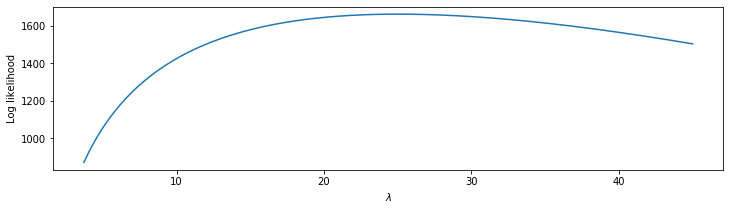

In [99]:
#Encontrando o lambda

lambdas = l * np.exp(-l * bins)*9
N3 = len(ISIsLow)
l = N3 * np.log(lambdas) - lambdas * sum(ISIsLow)
plot(lambdas, l)  
xlabel('$\lambda$')
ylabel('Log likelihood')
show()


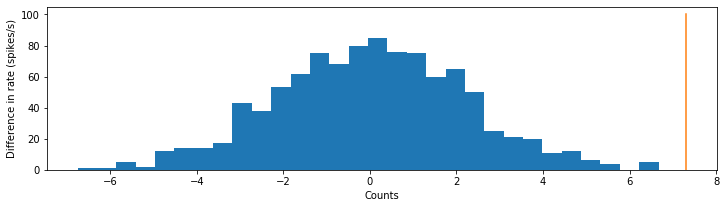

In [68]:
MLDiff = 1 / ISIsHigh.mean() - 1 / ISIsLow.mean()

ISIs = np.hstack([ISIsLow, ISIsHigh])  
Nall = len(ISIs)  
Nlo = len(ISIsLow) 
Nhi = len(ISIsHigh) 

sampDiff = [1 / np.mean(ISIs[np.random.randint(Nall, size=Nhi)]) -  
           1 / np.mean(ISIs[np.random.randint(Nall, size=Nlo)])     
           for _ in range(1000)]                                    


plt.hist(sampDiff, bins=30)       
plot([MLDiff, MLDiff], [0, 100]) 
xlabel('Counts')
ylabel('Difference in rate (spikes/s)')
show()



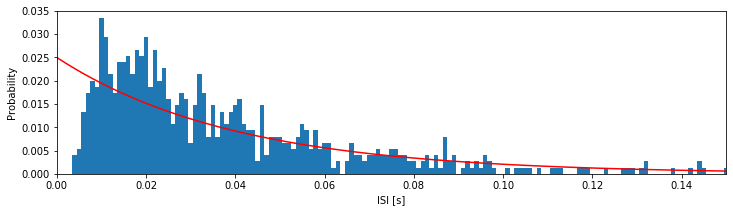

In [69]:
bins = np.arange(0, .5, 0.001)            
counts, _ = np.histogram(ISIsLow, bins)   
prob = counts / len(ISIsLow)              
plt.bar(bins[:-1], prob, width=0.001)     
lbda = 1 / ISIsLow.mean()                 
model = lbda * np.exp(-lbda * bins) * 0.001  
plot(bins, model, 'r')                    
plt.xlim([0, 0.15])                       
xlabel('ISI [s]')                         
ylabel('Probability')                     
show()


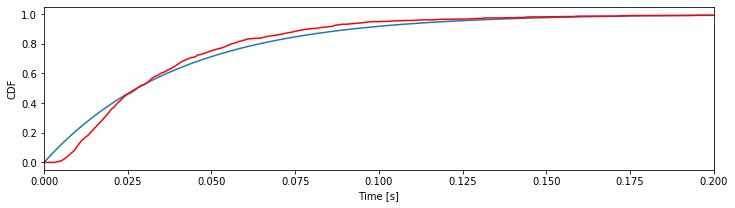

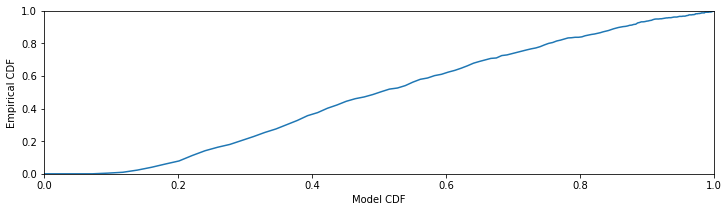

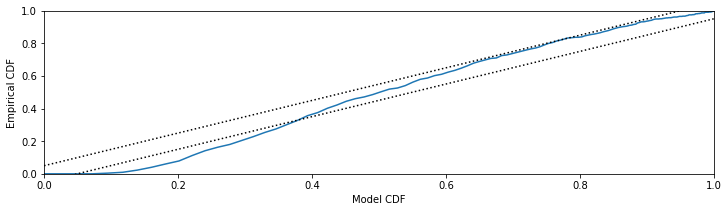

In [75]:
#Qualidade do modelo
#Se o seu modelo reflete bem o modelo real, as 2 deveriam estar uma em cima da outra

bins = np.arange(0, 0.5, 0.001)    
lbda = 1 / ISIsLow.mean()           
FmodLow = 1 - np.exp(-lbda * bins)  
FempLow = np.cumsum(prob)           
plot(bins, FmodLow)                 
plot(bins[:-1], FempLow, 'r')       
plt.xlim([0, 0.2])                  
xlabel('Time [s]')
ylabel('CDF')
show()

fig, ax = plt.subplots()
plot(FmodLow[:-1], FempLow)    
plt.axis([0, 1, 0, 1])         
xlabel('Model CDF')
ylabel('Empirical CDF')
show()

Nlow = len(ISIsLow)  
ax.plot([0, 1], [x + 1.36 / np.sqrt(Nlow) for x in [0, 1]], 'k:')
ax.plot([0, 1], [x - 1.36 / np.sqrt(Nlow) for x in [0, 1]], 'k:')
fig


